# K-cluster Algorithm Analysis

In this script, our objective is to apply unsupervised machine learning to uncover new patterns within the dataset. We will utilize the K-means clustering algorithm to identify distinct clusters and gain insights into their characteristics.

In [12]:
# Imported Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [13]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.
%matplotlib inline

In [14]:
Path = r'C:\Users\Raghu\Desktop\6.3 excerise\original data\Adidas US Sales Datasets.xlsx'

In [17]:
import os

path = r'C:\Users\Raghu\Desktop\6.3 excerise\original data'

# Read the Excel file
df = pd.read_excel(os.path.join(path, 'Adidas US Sales Datasets.xlsx'), index_col=False)


### Data Cleaning

In [18]:
df.shape

(9648, 13)

In [19]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [50]:
Dropcolumns = ['Unnamed' , 'Invoice Date', 'Retailer', 'Region', 'State', 'City', 'Sales Method', 'Product']


In [52]:
# drop unnecessary columns including categorical columns
Dropcolumns = ['Unnamed: 0.1', 'Invoice Date', 'Retailer', 'Region', 'State', 'City', 'Sales Method', 'Product']

# Filter columns that exist in the DataFrame before attempting to drop
columns_to_drop = [col for col in Dropcolumns if col in df.columns]

# Drop the filtered columns
df = df.drop(columns=columns_to_drop)

### Find the Elbow

In [53]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [54]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
# Creates a score that represents a rate of variation for the given cluster option.


C:\Users\Raghu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raghu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raghu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raghu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

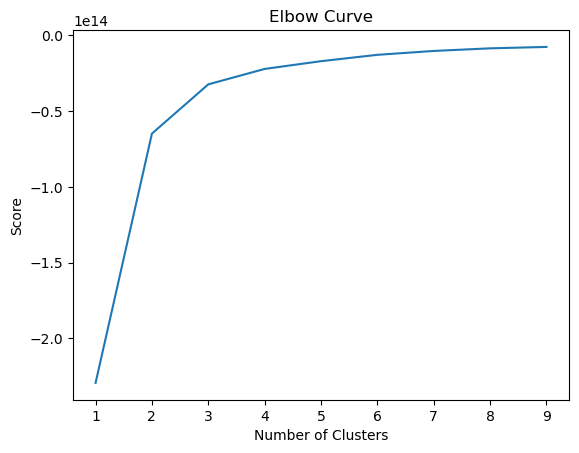

In [55]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**_The curve begins to straightens out after three. This means the optimal number of cluster is three.

### K-means Clustering 

In [56]:
# Create the k-means object.
kmeans = KMeans(n_init=10,n_clusters = 3)

In [57]:
# Fit the k-means object to the data.
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [58]:
df['clusters'] = kmeans.fit_predict(df) #adding clusters column to a dataframe

In [59]:
df.head()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,clusters
0,1185732,50.0,1200,600000.0,300000.0,0.50,0
1,1185732,50.0,1000,500000.0,150000.0,0.30,0
2,1185732,40.0,1000,400000.0,140000.0,0.35,0
3,1185732,45.0,850,382500.0,133875.0,0.35,0
4,1185732,60.0,900,540000.0,162000.0,0.30,0


In [60]:
df['clusters'].value_counts()

clusters
1    6745
2    2057
0     846
Name: count, dtype: int64

### Total sales vs Operating profit

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


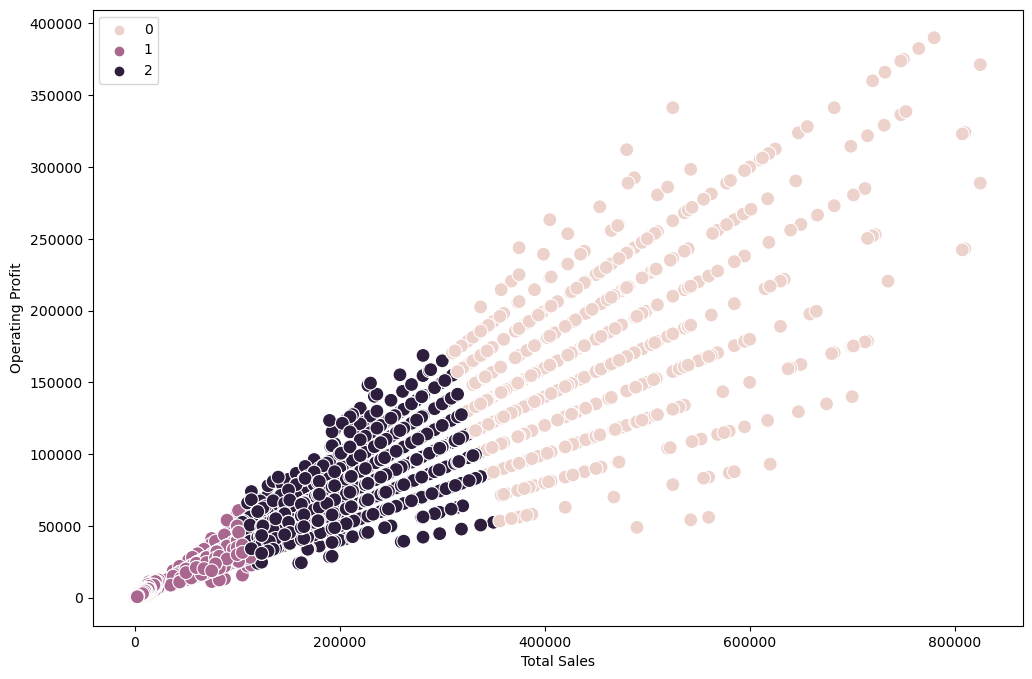

In [66]:
# Plot the clusters for the "Total sales " and "Operating profit" variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['Total Sales'], y=df['Operating Profit'], hue=kmeans.labels_, s=100)
ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Total Sales')  # Label x-axis.
plt.ylabel('Operating Profit')  # Label y-axis.
plt.show()


### Price per Unit vs	Units Sold

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


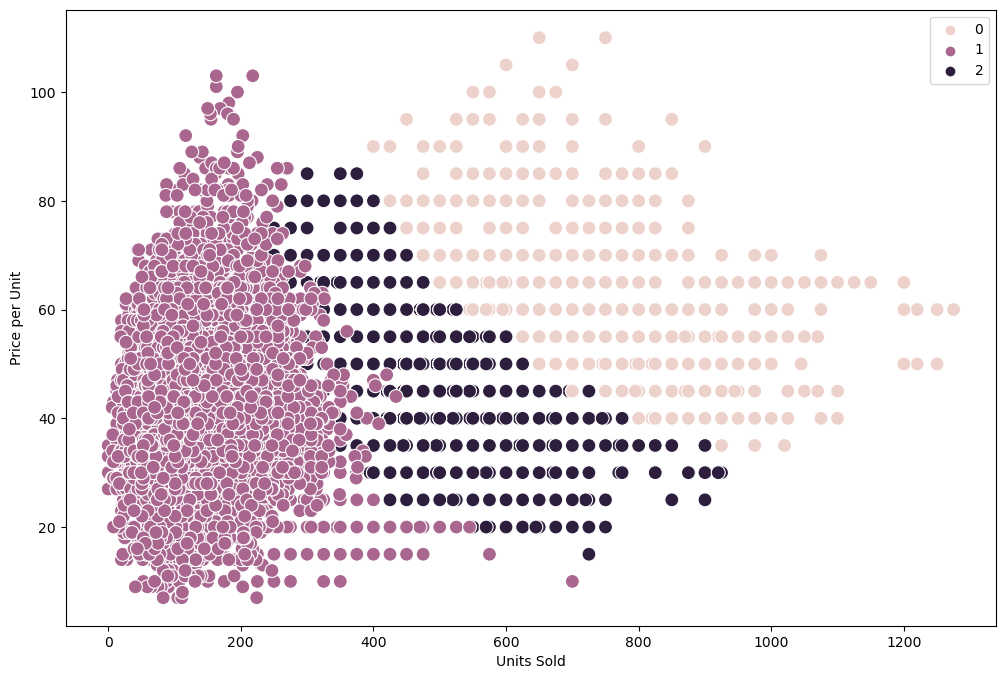

In [69]:
# Plot the clusters for the \"Price per Unit\" and \" Units Sold\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Price per Unit'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Units Sold') # Label x-axis.
plt.ylabel('Price per Unit') # Label y-axis.
plt.show()

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


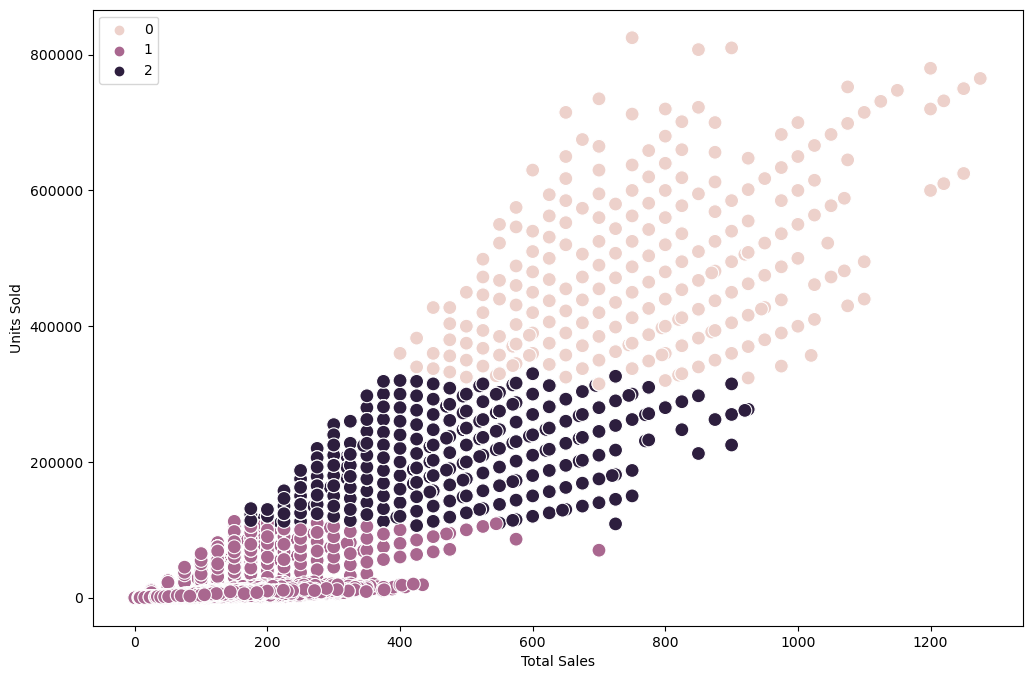

In [70]:
# Plot the clusters for the \"Units Sold\" and \" Total Sales\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Total Sales'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales') # Label x-axis.
plt.ylabel('Units Sold') # Label y-axis.
plt.show()
		

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


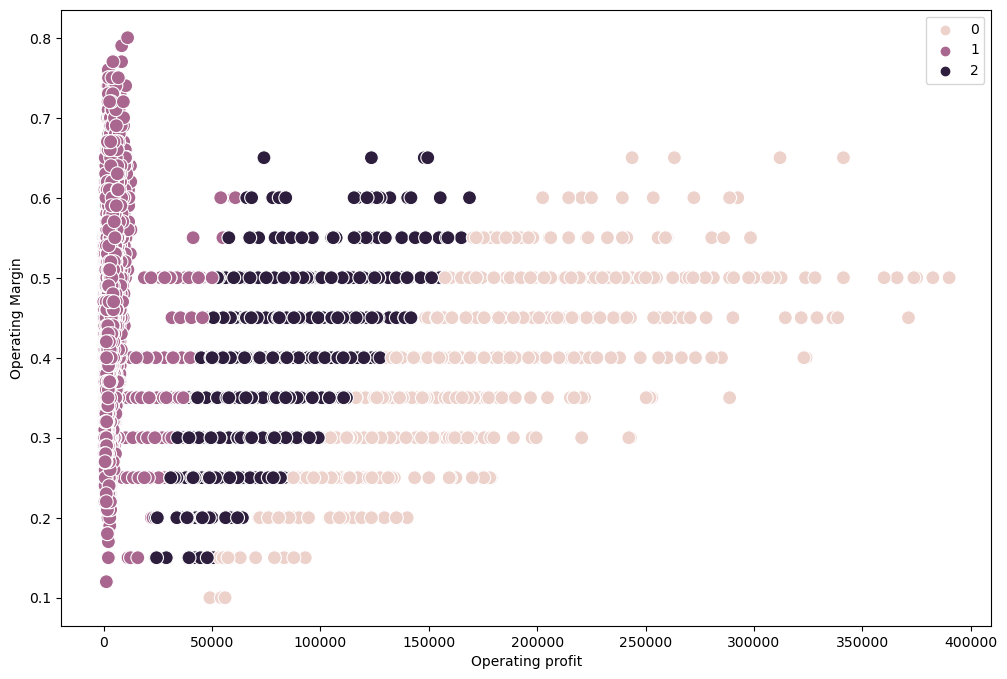

In [72]:
# Plot the clusters for the \"Operating Profit" and \" Operating Margin\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Operating Profit'], y=df['Operating Margin'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Operating profit') # Label x-axis.
plt.ylabel('Operating Margin') # Label y-axis.
plt.show()

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


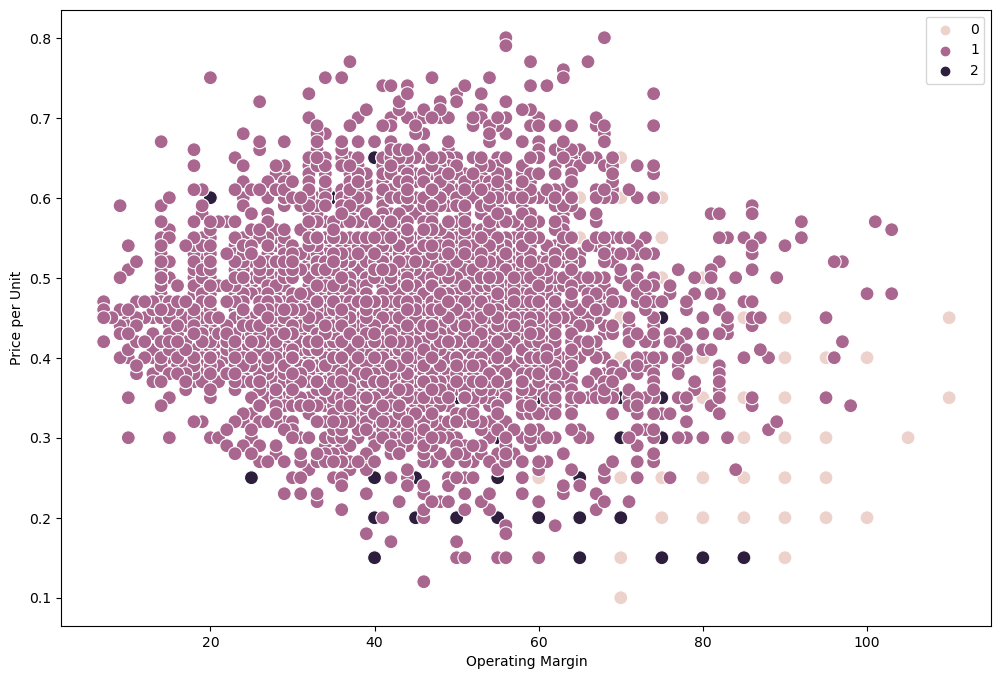

In [74]:
# Plot the clusters for the \"Price per Unit" and \" Operating Margin\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price per Unit'], y=df['Operating Margin'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Operating Margin') # Label x-axis.
plt.ylabel('Price per Unit') # Label y-axis.
plt.show()

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


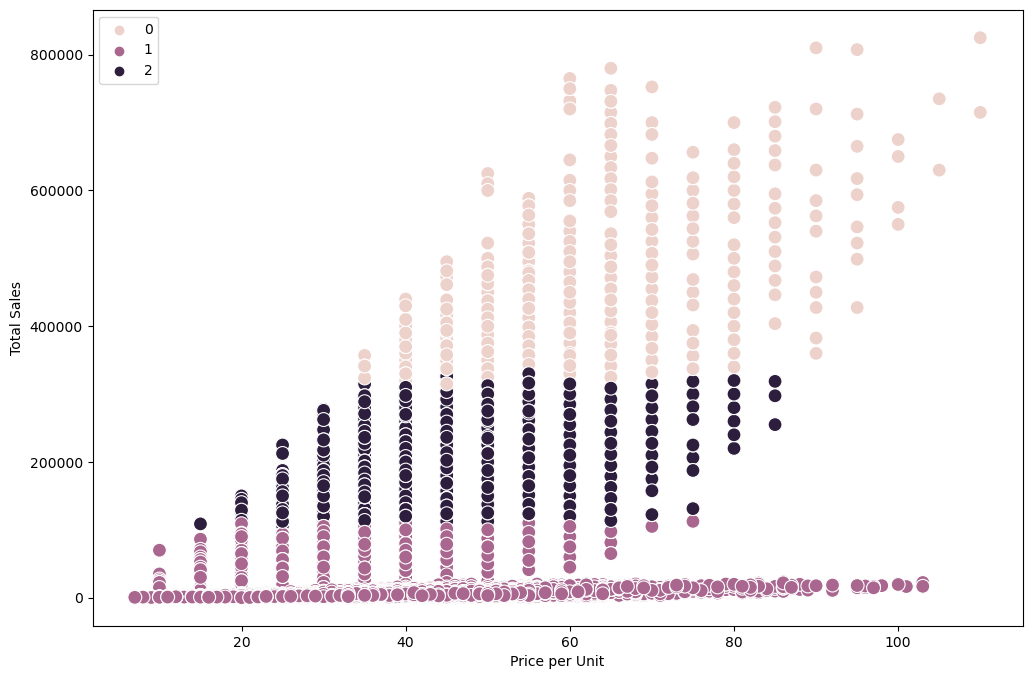

In [76]:
# Plot the clusters for the \"Price per Unit" and \" Total Sales\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price per Unit'], y=df['Total Sales'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price per Unit') # Label x-axis.
plt.ylabel('Total Sales') # Label y-axis.
plt.show()

## Key Insights\n
 Both totale sales and profit have minimal impact on the overall profit. Rest of the variables indicating a positive relationship.

### The Descriptive Statistics

In [77]:
#rename clusteres
df.loc[df['clusters'] == 2, 'clusters'] = 'dark purple'
df.loc[df['clusters'] == 1, 'clusters'] = 'purple'
df.loc[df['clusters'] == 0, 'clusters'] = 'pink'

C:\Users\Raghu\AppData\Local\Temp\ipykernel_8488\3007824297.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'clusters'] = 'dark purple'


In [79]:
df.groupby('clusters').agg({
    'Price per Unit': ['mean', 'median'],
    'Units Sold': ['mean', 'median'],
    'Total Sales': ['mean', 'median'],
    'Operating Profit': ['mean', 'median'],
    'Operating Margin': ['mean', 'median']
})

Price per Unit         Units Sold           Total Sales            \
                      mean median        mean median           mean    median   
clusters                                                                        
dark purple      48.543996   50.0  432.997083  425.0  202465.240642  195000.0   
pink             62.458629   60.0  736.347518  725.0  450352.245863  425000.0   
purple           42.039288   41.0  143.103929  133.0   15186.527057    5846.0   

            Operating Profit            Operating Margin         
                        mean     median             mean median  
clusters                                                         
dark purple     73398.723870   70000.00         0.364171   0.35  
pink           167056.456856  157500.00         0.372813   0.35  
purple           5904.199251    2657.76         0.447223   0.45

The pink cluster has the highest overall mean and median, followed by the dark purple cluster, and then the purple cluster.
 Examining both the descriptive statistics and the shapes of scatter plots, all four clusters exhibit different pattern. Initially, comparing total sales and unit sold key factors by regions seemed like a good idea, but using these three clusters for analysis may provide more valuable insights.

In [80]:
df['clusters'].value_counts()

clusters
purple         6745
dark purple    2057
pink            846
Name: count, dtype: int64

#export to csv

In [87]:
Path = r'C:\Users\Raghu\Desktop\6.3 excerise\prepared data\Adidas US Sales Datasets.xlsx'

In [92]:
import os

output_directory = os.path.join(path, 'Clean')

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Save the DataFrame to CSV
df.to_csv(os.path.join(output_directory, 'Adidas_US_Sales_Datasets.csv'), index=False)
